In [109]:
import matplotlib.pyplot as plt
import numpy as np

In [110]:
np.random.seed(0)

In [111]:
M = 200  # Nombre de trajectoires
N = 500 # Durée totale (en année)
u0 = 1  # valeur initiale (en €)
T = np.arange(N)  # Indices des temps (en années)
c = 0.1  # Débit d'argent rentrant (en €/année)
lambda_T = 2  # Paramètre de la loi de Poisson pour les durées entre sinistres
scale_X = 1  # Paramètre de la loi de Poisson pour le montant des sinistres
n_samples_per_time_unit = 1 + int(lambda_T + 5 * np.sqrt(lambda_T))  # Taille du tableau des sinistres
dN = np.hstack((np.zeros((M, 1)), np.random.poisson(lambda_T, (M, N - 1))))
X = np.random.exponential(scale_X, (M, N, n_samples_per_time_unit))
dS = np.sum((np.arange(n_samples_per_time_unit) < dN.reshape(M, N, 1)) * X, axis=2)
S = np.cumsum(dS, axis=1)

In [118]:
help(np.random.poisson)

Help on built-in function poisson:

poisson(...) method of numpy.random.mtrand.RandomState instance
    poisson(lam=1.0, size=None)
    
    Draw samples from a Poisson distribution.
    
    The Poisson distribution is the limit of the binomial distribution
    for large N.
    
    .. note::
        New code should use the ``poisson`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    lam : float or array_like of floats
        Expectation of interval, must be >= 0. A sequence of expectation
        intervals must be broadcastable over the requested size.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``lam`` is a scalar. Otherwise,
        ``np.array(lam).size`` samples are drawn.
    
    Returns
    -------
    out : ndar

In [119]:
dN

array([[0., 3., 2., ..., 1., 4., 1.],
       [0., 0., 1., ..., 2., 1., 1.],
       [0., 0., 2., ..., 3., 1., 4.],
       ...,
       [0., 1., 3., ..., 2., 5., 0.],
       [0., 2., 3., ..., 4., 0., 0.],
       [0., 2., 0., ..., 3., 3., 0.]])

$u_{n} = 1 + c n - S_{n}$ où $S_{n} = \sum_{i = 0}^{N_{n}} X_i$.

In [112]:
u = u0 + c * T - S
u_alive = ~np.cumsum(u<0, axis=1).astype(bool)
u_cutted = u*(u_alive)
phi = np.mean(u_alive, axis=0)

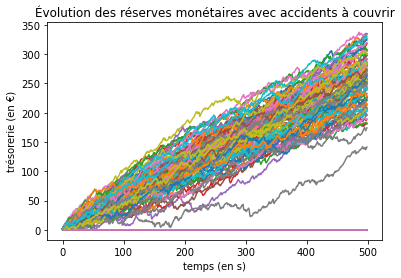

In [113]:
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u_cutted.T)
plt.show()

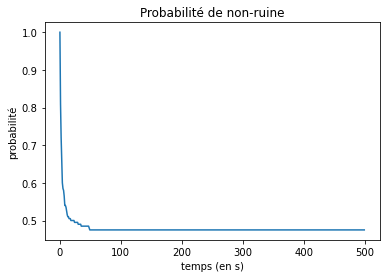

In [114]:
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité")
plt.plot(phi)
plt.show()

<ipython-input-115-c84e6b8e26c6>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(phi - phi[-1]))


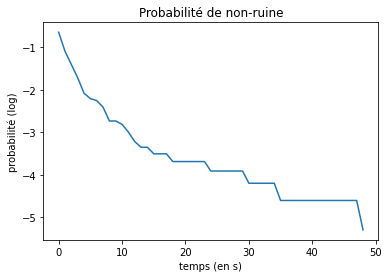

In [115]:
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité (log)")
plt.plot(np.log(phi))
plt.show()

In [117]:
n_samples_per_time_unit

10